In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv("/kaggle/input/mcdonalds/mcdonalds.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1453, 15)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [2]:
# Check for null values
print(df.isnull().sum())

# Drop non-informative columns (e.g., IDs or personal info if any)
df_cleaned = df.drop(columns=["VisitFrequency"], errors='ignore')

# Convert 'Yes'/'No' to 1/0
df_encoded = df_cleaned.replace({"Yes": 1, "No": 0})

# Check if encoding worked
df_encoded.head()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male


In [3]:
# Step 3: Convert Yes/No to 1/0
df_encoded = df.replace({"Yes": 1, "No": 0})

# Step 4: Drop non-numeric columns (like text or free responses)
df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

# Step 5: Scale only numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

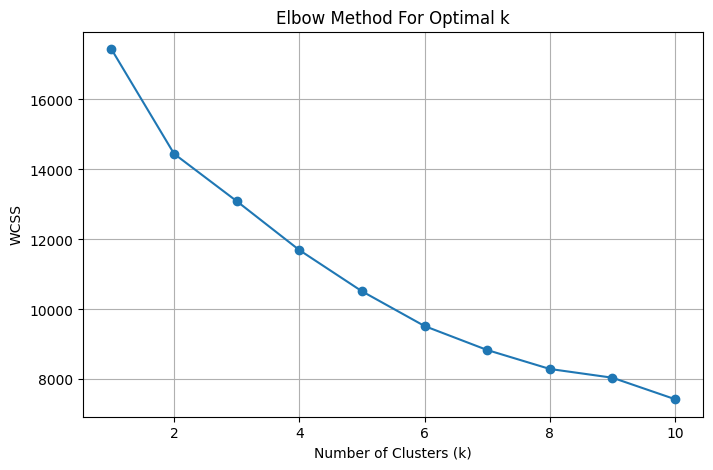

In [4]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,2
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


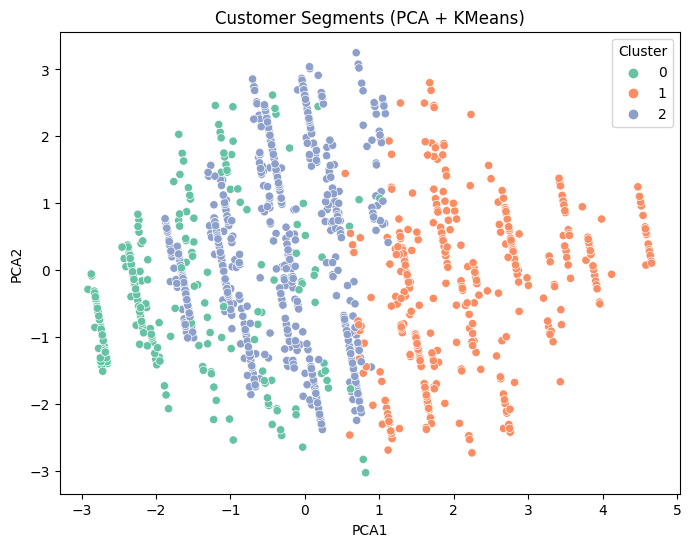

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette='Set2')
plt.title("Customer Segments (PCA + KMeans)")
plt.show()

In [7]:
df = df.drop(['Like','VisitFrequency'] , axis =1)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,Cluster,PCA1,PCA2
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,61,Female,1,0.797479,-1.087322
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,51,Female,2,-0.471542,0.932960
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,62,Female,2,0.273985,0.729415
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,69,Female,2,-0.027463,-0.918218
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,49,Male,2,0.003050,-1.536837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,47,Male,1,3.494149,0.890957
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,36,Female,0,-1.600551,0.475125
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,52,Female,2,-0.400264,1.589517
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,41,Male,0,-2.786725,-0.566140


In [8]:
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Male': 1, 'Female': 0})

In [9]:
cluster_profiles = df.groupby('Cluster').mean()
cluster_profiles.T  # Transpose for easier view

Cluster,0,1,2
yummy,0.796992,0.049096,0.715000
convenient,0.954887,0.710594,0.987500
spicy,0.120301,0.074935,0.093750
fattening,0.360902,0.945736,0.997500
greasy,0.056391,0.723514,0.587500
fast,0.924812,0.759690,0.960000
cheap,0.718045,0.333333,0.687500
tasty,0.864662,0.100775,0.833750
expensive,0.210526,0.607235,0.286250
healthy,0.755639,0.043928,0.088750


In [10]:
df.to_csv("mcdonalds_clustered.csv", index=False)